In [67]:
import pickle
import numpy as np
import os

In [68]:
save_path = f"../results"

In [69]:
Btot = [512, 128]

In [70]:
name = "lstm_simulation"
nmse_lstm_mean = []
nmse_lstms = []
leg = []
for btot in Btot:
    nmse_lstm = np.load(os.path.join(save_path, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstm_mean.append(np.mean(10 * np.log10(nmse_lstm)))
    nmse_lstms.append(nmse_lstm)
    leg.append(f"Proposed - {btot} bits")
    
name = "reference"
nmse_ref_mean = []
nmse_refs = []
for btot in Btot:
    nmse_ref = np.load(os.path.join(save_path, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_ref_mean.append(np.mean(10*np.log10(nmse_ref)))
    nmse_refs.append(nmse_ref)
    leg.append(f"Original - {btot} bits")

In [71]:
nmse_lstm

array([0.11368263, 0.06401417, 0.06242266, ..., 0.19063666, 0.17852888,
       0.19388932])

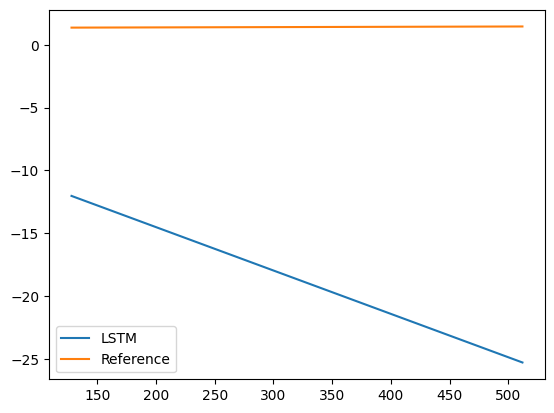

In [72]:
import matplotlib.pyplot as plt
plt.plot(Btot,nmse_lstm_mean)
plt.plot(Btot,nmse_ref_mean)
plt.legend(["LSTM","Reference"])

In [73]:
nmse_lstm = np.load(f'{save_path}\\nmse-{"lstmplot"}_Btot_{1024}.npy')
nmse_ref = np.load(f'{save_path}\\nmse-{"reference"}_Btot_{1024}.npy')


FileNotFoundError: [Errno 2] No such file or directory: '../results\\nmse-lstmplot_Btot_1024.npy'

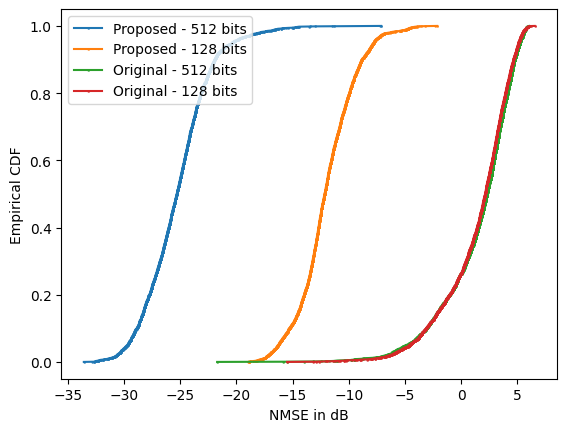

In [74]:
nmse_lstms.extend(nmse_refs)

markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))
    
    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)
    
    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')
        
    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')


plt.legend(leg)
plt.savefig(os.path.join(save_path, f'cdf_allbits.png'), dpi=300)

In [29]:
plt.plot(nmse_ref1)
plt.plot(nmse_ref2)

NameError: name 'nmse_ref1' is not defined